In [176]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [177]:
df_envi_inter = pd.read_csv("../../../DataSet/Envi/envi_inter.csv")
df_envi_inter

,Date,Envi
0,04/01/2015,44562
1,11/01/2015,38112
2,18/01/2015,50355
3,25/01/2015,51922
4,01/02/2015,67496
...,...,...
164,25/02/2018,42116
165,04/03/2018,44454
166,11/03/2018,28399
167,18/03/2018,49145


In [178]:
df_envi_inter["Date"] = pd.to_datetime(df_envi_inter["Date"], unit="ns")
df_envi_inter.sort_values(by="Date", inplace=True)

In [179]:
def findBestRandomState(r,t, x, y):
    random = 0
    a = 100

    model = LinearRegression()
    for _ in range(r,t):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=_)
        model.fit(x_train, y_train)

        y_predict = model.predict(x_test)
        if (buff := mean_absolute_error(y_test, y_predict)) < a:
            a = buff
            random = _
    print(a, random)

Function Create X Sequence to Prdict 1

In [180]:
def createSequenceToOneDataSet(r, data:pd.DataFrame):  # Create Sequence DataSet
    df = data.copy()
    i = 1
    
    while i < r:
        df[f'x{i}'] = df['Envi'].shift(-i)
        i += 1

    if i == r:
        df['y'] = df['Envi'].shift(-i)

    df = df.dropna(axis=0)
    return df

DataSet for Predict y by Use Sequence X

In [181]:
df = createSequenceToOneDataSet(5, df_envi_inter)
df

,Date,Envi,x1,x2,x3,x4,y
4,2015-01-02,67496,40578.0,30435.0,50355.0,51922.0,51151.0
8,2015-01-03,40578,30435.0,50355.0,51922.0,51151.0,41548.0
43,2015-01-11,30435,50355.0,51922.0,51151.0,41548.0,50872.0
2,2015-01-18,50355,51922.0,51151.0,41548.0,50872.0,66880.0
3,2015-01-25,51922,51151.0,41548.0,50872.0,66880.0,51472.0
...,...,...,...,...,...,...,...
160,2018-01-28,66654,39773.0,42116.0,49145.0,40362.0,57481.0
163,2018-02-18,39773,42116.0,49145.0,40362.0,57481.0,44454.0
164,2018-02-25,42116,49145.0,40362.0,57481.0,44454.0,45937.0
167,2018-03-18,49145,40362.0,57481.0,44454.0,45937.0,48309.0


In [182]:
x = df[['Envi','x1','x2','x3','x4']].values # Pasing Df_x to x
y = df['y'].values                          # Pasing Df_y to y



# findBestRandomState(1000000,2000000,x, y)
# seed 82103 MAE: 0.23750

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=82103)

In [183]:
y_t = df['y']
y_t

4      51151.0
8      41548.0
43     50872.0
2      66880.0
3      51472.0
        ...   
160    57481.0
163    44454.0
164    45937.0
167    48309.0
168    28399.0
Name: y, Length: 164, dtype: float64

In [184]:
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [185]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [186]:
y_predict = ml.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}")
print(f"The Mean Square Error: {mean_squared_error(y_test, y_predict)}")
print(f"The R2 score: {r2_score(y_test, y_predict)}")


Mean Absolute Error: 4871.803836914005
The Mean Square Error: 34888888.39372255
The R2 score: 0.47418068696123383


In [187]:
result = ml.predict(x)
df['y_predict'] = result
df['y_predict'] = df["y_predict"].astype("int64")
df

,Date,Envi,x1,x2,x3,x4,y,y_predict
4,2015-01-02,67496,40578.0,30435.0,50355.0,51922.0,51151.0,44405
8,2015-01-03,40578,30435.0,50355.0,51922.0,51151.0,41548.0,45775
43,2015-01-11,30435,50355.0,51922.0,51151.0,41548.0,50872.0,41963
2,2015-01-18,50355,51922.0,51151.0,41548.0,50872.0,66880.0,46906
3,2015-01-25,51922,51151.0,41548.0,50872.0,66880.0,51472.0,50710
...,...,...,...,...,...,...,...,...
160,2018-01-28,66654,39773.0,42116.0,49145.0,40362.0,57481.0,42828
163,2018-02-18,39773,42116.0,49145.0,40362.0,57481.0,44454.0,47579
164,2018-02-25,42116,49145.0,40362.0,57481.0,44454.0,45937.0,41683
167,2018-03-18,49145,40362.0,57481.0,44454.0,45937.0,48309.0,46372


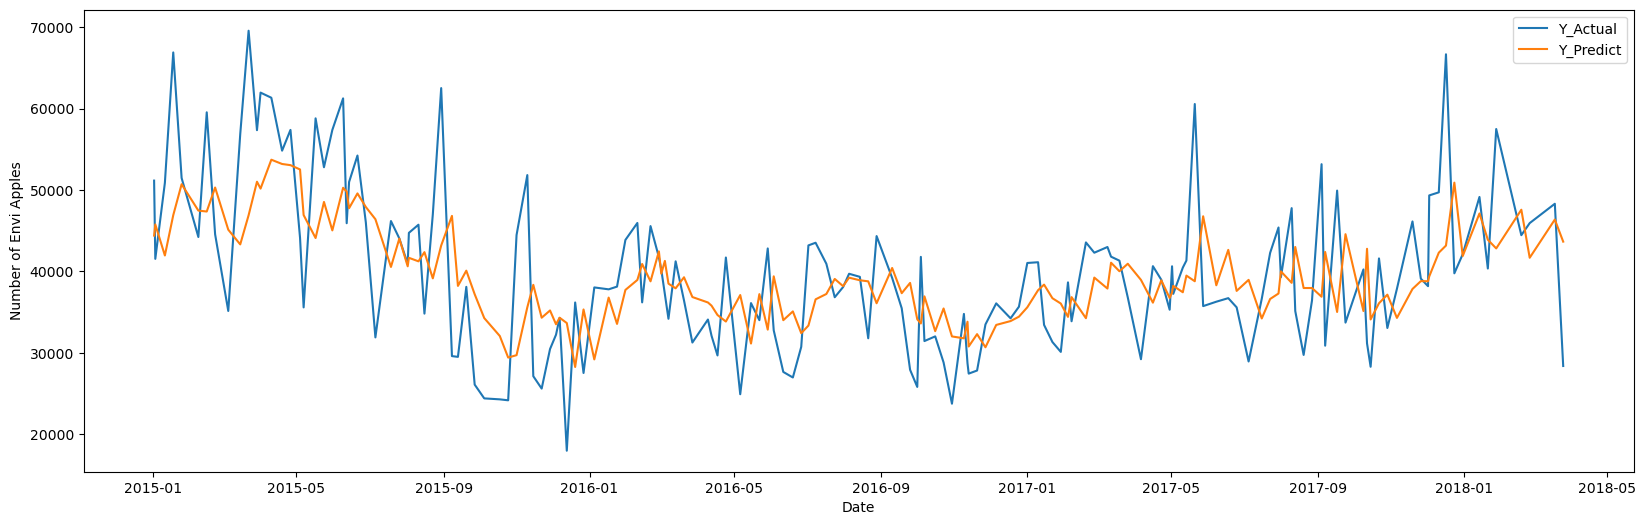

In [196]:
plt.figure(figsize=(20, 6))
plt.plot(df["Date"], df["y"], label="Y_Actual")
plt.plot(df["Date"], df["y_predict"], label="Y_Predict")
plt.xlabel("Date")
plt.ylabel("Number of Envi Apples")
plt.legend()
plt.show()

In [195]:
print(ml.predict([[22243,22223,42342,46546,22425]]))

[31866.59554094]
